In [53]:
import pandas as pd
from matplotlib import pyplot as plt

# csv 읽어오기, 현재 위치에 해당 파일이 없으면 첫번째 파라미터에 정확한 경로를 포함한 파일명 기입
df = pd.read_csv('company_nps_data.csv', encoding='cp949')# 'cp949', 'euc-kr'
df.head()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151


In [54]:
# 연도 탐색

year_list = list(df.년도.unique())
year_list = sorted(year_list)
year_list = list(map(str, year_list)) # 내부의 숫자는 numpy.int type

print('Year_Range:', ', '.join(year_list))

Year_Range: 2015, 2016, 2017, 2018, 2019


In [55]:
# 회사 id 리스트 추출

id_list = list(df.회사ID.unique())
id_list = sorted(id_list)
#print("ID_Count:", len(id_list))
#print('ID_List:', id_list)



In [102]:
# 회사 데이터 조회 함수

def search_company_data(id): # id_type: str, int
    df = pd.read_csv('company_nps_data.csv', encoding='cp949')
    df1 = df.query(f'회사ID == {id}') # 해당 회사 row 추출
    df1 = df1.sort_values(by=['년도', '월']) # 년도별로 월별로 정렬, 내림차순: ascending=False
    result = df1.reset_index(drop=True)
    
    def tranform_str(column):
        column = list(map(str, column))
        return pd.Series(column)

    result['연월'] = tranform_str(result['년도']) + '.' + tranform_str(result['월'])
    return result

select_company = search_company_data(129243)
select_company

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,연월
0,129243,7835388,2015,11,34222380,142,2015.11
1,129243,7835388,2015,12,34485640,144,2015.12
2,129243,8202009,2016,1,34708220,146,2016.1
3,129243,8202009,2016,2,35091080,148,2016.2
4,129243,8202009,2016,3,34579000,146,2016.3
5,129243,8202009,2016,4,34645880,147,2016.4
6,129243,8202009,2016,5,34402440,146,2016.5
7,129243,8202009,2016,6,33102320,140,2016.6
8,129243,8202009,2016,7,33586300,138,2016.7
9,129243,8202009,2016,8,33712300,139,2016.8


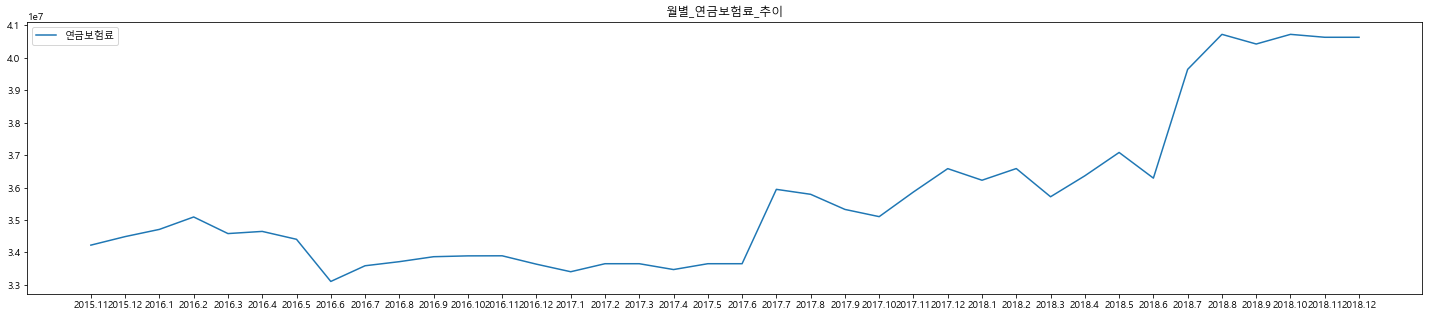

In [103]:
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic' # Windows용
x = select_company['연월']
y = select_company['월별_연금보험료']

plt.figure(figsize=(25, 5))
plt.title('월별_연금보험료_추이')
plt.plot(x, y, label='연금보험료')
plt.legend() # 범례 설정

plt.show() # 그래프 출력

# 저장 필요할 시
#plt.savefig('./광고별_남녀_클릭횟수_분석.png') # 그래프 출력결과를 파일로 저장합니다.